# Google Business Store Dataset


In [59]:
from util import agg_jsonls  # helper function
from pprint import pprint
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
unique_ids = set()
reviewsGB = []
for complaint in agg_jsonls("final_dataset_GB_1704"):
    if "id_review" in complaint and complaint["id_review"] not in unique_ids:
        unique_ids.add(complaint["id_review"])
        reviewsGB.append(complaint)

print(f"We have a total of {len(reviewsGB)} reviews!")
pprint(reviewsGB[0])

We have a total of 140416 reviews!
{'caption': 'Muito boa!  O Cleversom nos atendeu com muita empatia e atenção!',
 'geo_location': {'lat': '-23.5448085', 'long': '-46.5175485'},
 'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjdGN1SHJnRRABGhY3RXo1WS1Td0tMN3Fmdzh4UmQ1QjR3',
 'n_photo_user': 0,
 'n_review_user': 0,
 'rating': 4.0,
 'relative_date': '3 semanas atrás',
 'retrieval_date': '2020-04-13T17:25:36Z',
 'store': 'casas-bahia',
 'url_user': 'https://www.google.com/maps/contrib/109717936372979710465?hl=pt-BR',
 'username': 'Veranilce Carelli'}


In [35]:
caption_reviews = [i for i in reviewsGB if len(i["caption"]) > 0]

print(f"Reviews with caption: {round((len(caption_reviews) / len(reviewsGB))*100,2)}%")

Reviews with caption: 40.15%


In [36]:
pprint(caption_reviews[0:3])

[{'caption': 'Muito boa!  O Cleversom nos atendeu com muita empatia e atenção!',
  'geo_location': {'lat': '-23.5448085', 'long': '-46.5175485'},
  'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjdGN1SHJnRRABGhY3RXo1WS1Td0tMN3Fmdzh4UmQ1QjR3',
  'n_photo_user': 0,
  'n_review_user': 0,
  'rating': 4.0,
  'relative_date': '3 semanas atrás',
  'retrieval_date': '2020-04-13T17:25:36Z',
  'store': 'casas-bahia',
  'url_user': 'https://www.google.com/maps/contrib/109717936372979710465?hl=pt-BR',
  'username': 'Veranilce Carelli'},
 {'caption': 'Atendimento muito bom.!',
  'geo_location': {'lat': '-23.5448085', 'long': '-46.5175485'},
  'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjNWNHYXRBRRABGhZ2Z1lLMjI5TjdNM2ZNb3FMNTQwZ2VB',
  'n_photo_user': 0,
  'n_review_user': 0,
  'rating': 5.0,
  'relative_date': '3 semanas atrás',
  'retrieval_date': '2020-04-13T17:25:36Z',
  'store': 'casas-bahia',
  'url_user': 'https://www.google.com/maps/contrib/115563939635497280539?hl=pt-BR',
  'username': 'Mathias Villan'},
 {

In [37]:
# Average rates
print(f"Average grade {np.average([i['rating'] for i in reviewsGB])}")

Average grade 3.9190120783956246


In [38]:
relative_date = {
    'uma semana atrás': 7,
    '2 semanas atrás': 14,
    '3 semanas atrás': 21, 
    '4 semanas atrás': 28, 
    'um mês atrás': 30,
    '2 meses atrás': 60, 
    '3 meses atrás': 90, 
    '4 meses atrás': 120, 
    '5 meses atrás': 150,
    '6 meses atrás': 180, 
    '7 meses atrás': 210, 
    '8 meses atrás': 240, 
    '9 meses atrás': 270,
    '10 meses atrás': 300, 
    '11 meses atrás': 330, 
    'um ano atrás': 365, 
    '2 anos atrás': 730,
    '3 anos atrás': 1095, 
    '4 anos atrás': 1460, 
    '5 anos atrás': 1825, 
    '6 anos atrás': 2190,
    '7 anos atrás': 2555, 
    '8 anos atrás': 2920, 
}

In [39]:
def comment_day(review):
    init_dt = datetime.strptime(review["retrieval_date"], '%Y-%m-%dT%H:%M:%SZ')
    relative = relative_date[review['relative_date']]
    return init_dt - timedelta(days=relative)

In [40]:
reviewsGB[0]

{'id_review': 'ChdDSUhNMG9nS0VJQ0FnSUNjdGN1SHJnRRABGhY3RXo1WS1Td0tMN3Fmdzh4UmQ1QjR3',
 'caption': 'Muito boa!  O Cleversom nos atendeu com muita empatia e atenção!',
 'relative_date': '3 semanas atrás',
 'retrieval_date': '2020-04-13T17:25:36Z',
 'rating': 4.0,
 'username': 'Veranilce Carelli',
 'n_review_user': 0,
 'n_photo_user': 0,
 'url_user': 'https://www.google.com/maps/contrib/109717936372979710465?hl=pt-BR',
 'geo_location': {'lat': '-23.5448085', 'long': '-46.5175485'},
 'store': 'casas-bahia'}

In [41]:
comment_day(reviewsGB[0])

datetime.datetime(2020, 3, 23, 17, 25, 36)

In [42]:
def comment_day(review):
    init_dt = datetime.strptime(review["retrieval_date"], '%Y-%m-%dT%H:%M:%SZ')
    relative = relative_date[review['relative_date']]
    return init_dt - timedelta(days=relative)

def format_GB_to_df(review):
    cols_for_df = ['caption', 'geo_location', 'id_review' , 'n_photo_user', 'n_review_user', 
                   'rating' , 'relative_date', 'retrieval_date', 'store', 'url_user', 'username']
    r_cp = {col: review[col] for col in cols_for_df if col in review}
    r_cp["len_comment"] = len(review['caption'])
    r_cp["relative"] = relative_date[review['relative_date']]
    r_cp["date_comment"] = comment_day(review)
    return r_cp

In [43]:
dff = pd.DataFrame([format_GB_to_df(row) for row in reviewsGB])
dff.head()

,caption,date_comment,geo_location,id_review,len_comment,n_photo_user,n_review_user,rating,relative,relative_date,retrieval_date,store,url_user,username
0,Muito boa! O Cleversom nos atendeu com muita ...,2020-03-23 17:25:36,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNjdGN1SHJnRRABGhY3RXo1WS...,64,0,0,4.0,21,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1097179363...,Veranilce Carelli
1,Atendimento muito bom.!,2020-03-23 17:25:36,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNjNWNHYXRBRRABGhZ2Z1lLMj...,23,0,0,5.0,21,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1155639396...,Mathias Villan
2,,2020-03-23 17:25:36,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChZDSUhNMG9nS0VJQ0FnSUNjaFphblhBEAEaFmM0cTBhaV...,0,0,6,5.0,21,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1147321611...,Maristela Boguta
3,,2020-03-23 17:25:36,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNjaGNidzNBRRABGhZ4Z3Z6bG...,0,0,5,5.0,21,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1067857579...,Daniele Andrade
4,👍🏼,2020-03-16 17:25:36,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNjLWFHYjF3RRABGhZROFBDNF...,2,0,0,5.0,28,4 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1042944931...,Pastor L L j


In [44]:
dff['year'] = dff['date_comment'].dt.year
dff['month'] = dff['date_comment'].dt.strftime('%m/%Y')
dff['week'] = dff['date_comment'].dt.week
dff.relative_date.unique()

array(['3 semanas atrás', '4 semanas atrás', 'um mês atrás',
       '2 meses atrás', '3 meses atrás', '4 meses atrás', '5 meses atrás',
       '6 meses atrás', '7 meses atrás', '8 meses atrás', '9 meses atrás',
       '10 meses atrás', '11 meses atrás', 'um ano atrás', '2 anos atrás',
       '3 anos atrás', '4 anos atrás', '5 anos atrás', '8 anos atrás',
       '6 anos atrás', '7 anos atrás', 'uma semana atrás',
       '2 semanas atrás'], dtype=object)

In [45]:
var_month = ['um ano atrás', '11 meses atrás', '10 meses atrás', '9 meses atrás', '8 meses atrás', 
             '7 meses atrás', '6 meses atrás', '5 meses atrás', '4 meses atrás', '3 meses atrás', 
             '2 meses atrás', 'um mês atrás', '4 semanas atrás', '3 semanas atrás','uma semana atrás','2 semanas atrás']


def evolution_graph(data, store, period):
    graph = data[data['store']==store].copy()
    if(period=='year'):
        graph = graph.groupby([period]).mean().reset_index()
        graph['year'] = pd.to_datetime(graph['year'], format="%Y")
        plt.plot(graph[period].dt.strftime('%Y'), graph['rating'],marker='.')
        plt.title(store)
        plt.axes.Axes.set_yticks([1.0,2.0,3.0,4.0,5.0])
    elif(period=='month'):
        graph = graph[graph['relative_date'].isin(var_month)].groupby([period]).agg({'rating':'mean',
                                                                                     'date_comment':'max'}).reset_index()
        plt.plot(graph['date_comment'].sort_values(), graph['rating'],marker='.')
        plt.title(store)
        #plt.xticks(rotation = 45)

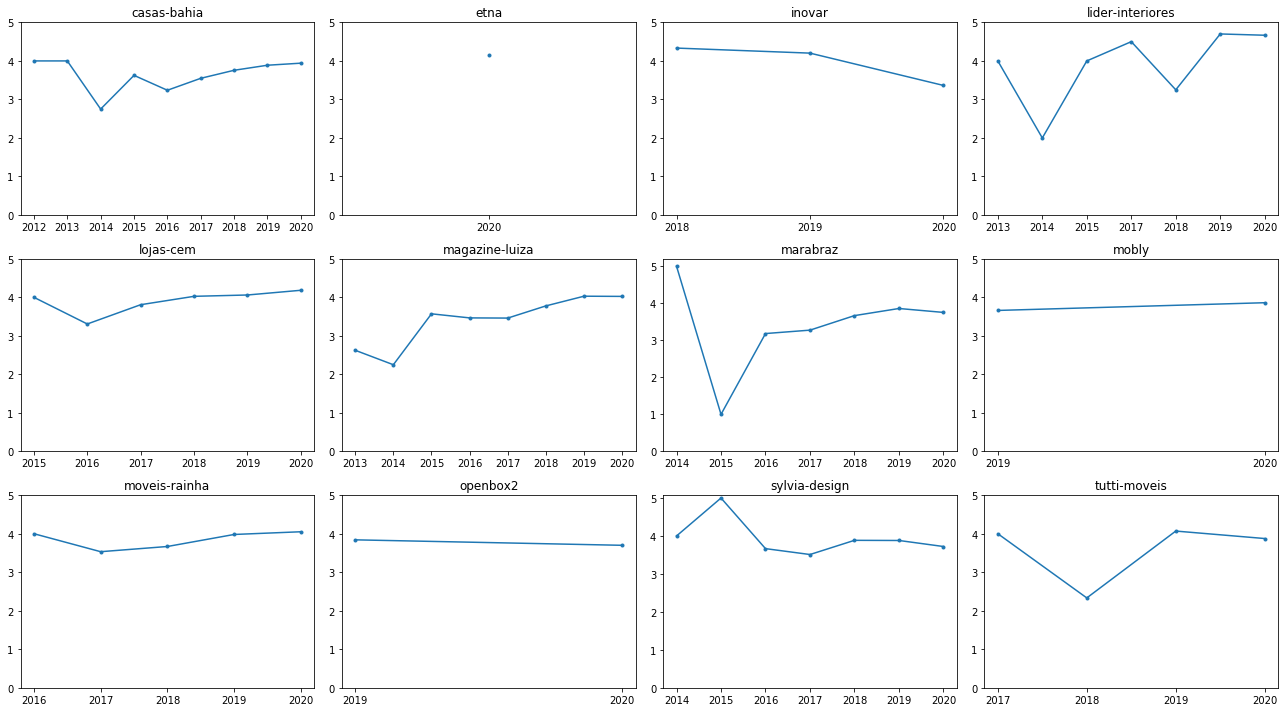

In [47]:
j=1
fig = plt.figure(figsize=(18,10))
for i in dff[~dff['store'].isna()]['store'].unique():
    ax1 = plt.subplot(3,4,j)
    graph = dff[dff['store']==i].copy()
    graph = graph.groupby('year').mean().reset_index()
    graph['year'] = pd.to_datetime(graph['year'], format="%Y")
    plt.plot(graph['year'].dt.strftime('%Y'), graph['rating'],marker='.')
    plt.title(i)
    ax1.set_yticks([0.0,1.0,2.0,3.0,4.0,5.0])
    j=j+1
plt.tight_layout()

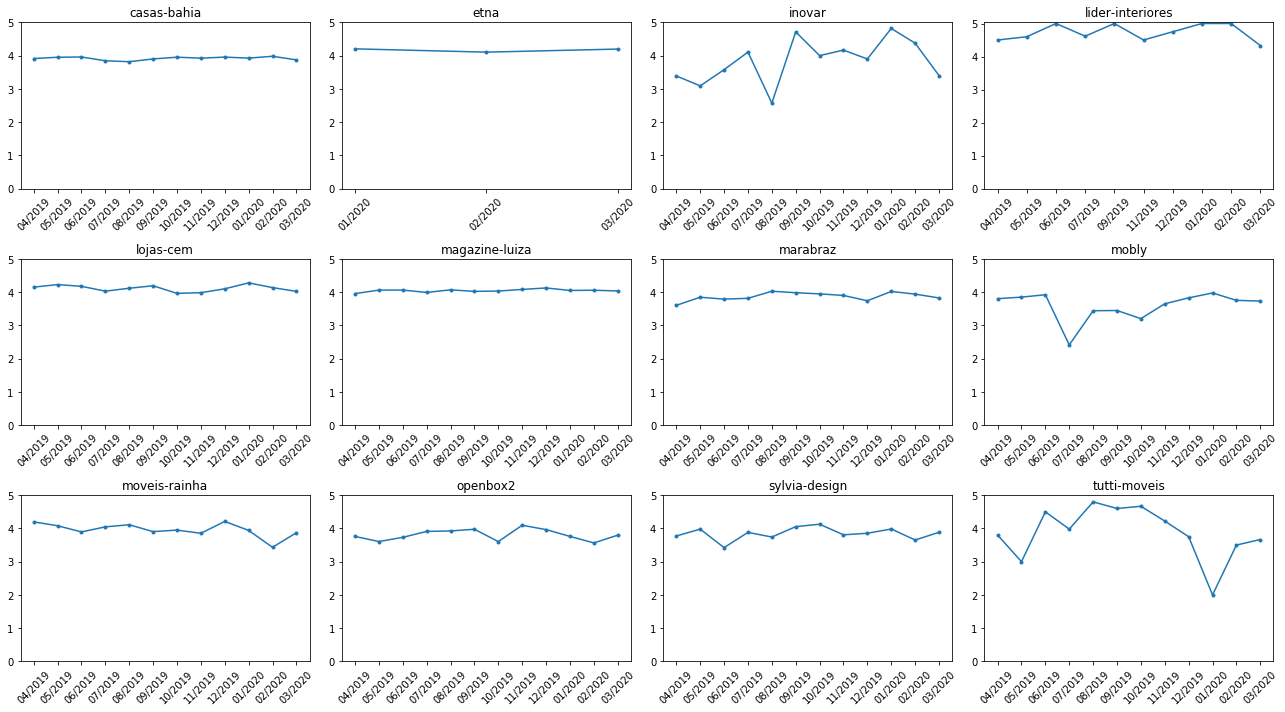

In [54]:
j=1
fig = plt.figure(figsize=(18,10))
for i in dff[~dff['store'].isna()]['store'].unique():
    ax1 = plt.subplot(3,4,j)
    graph = dff[dff['store']==i].copy()
    graph = graph[graph['relative_date'].isin(var_month)].groupby(['month']).agg({'rating':'mean',
                                                                                     'date_comment':'max'}).reset_index()
    plt.plot(graph['date_comment'].sort_values().dt.strftime('%m/%Y'), graph['rating'],marker='.')
    plt.title(i)
    ax1.set_yticks([0.0,1.0,2.0,3.0,4.0,5.0])
    plt.xticks(rotation=45)
    j=j+1
plt.tight_layout()

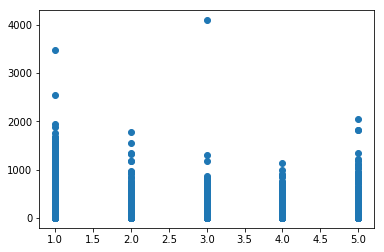

In [57]:
plt.scatter(y = dff[dff['len_comment']>0]['len_comment'], x=dff[dff['len_comment']>0]['rating']);

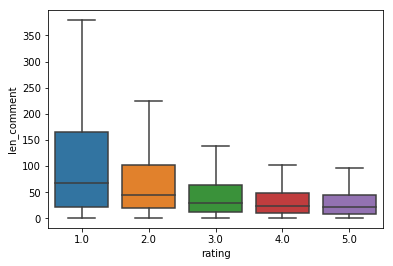

In [61]:
sns.boxplot(y = dff[dff['len_comment']>0]['len_comment'], x=dff[dff['len_comment']>0]['rating'],showfliers=False);

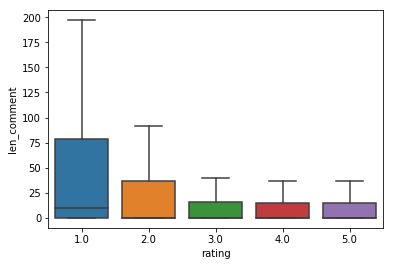

In [62]:
sns.boxplot(y = dff['len_comment'], x=dff['rating'],showfliers=False);

In [64]:
dff[['len_comment','rating']].corr()

,len_comment,rating
len_comment,1.000000,-0.208457
rating,-0.208457,1.000000


In [65]:
dff[dff['len_comment']>0][['len_comment','rating']].corr()

,len_comment,rating
len_comment,1.000000,-0.293935
rating,-0.293935,1.000000


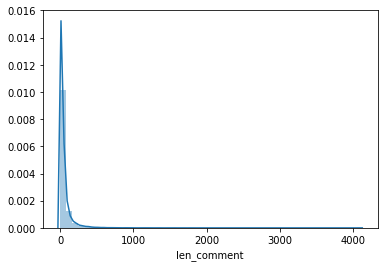

In [66]:
sns.distplot(dff[dff['len_comment']>0]['len_comment']);

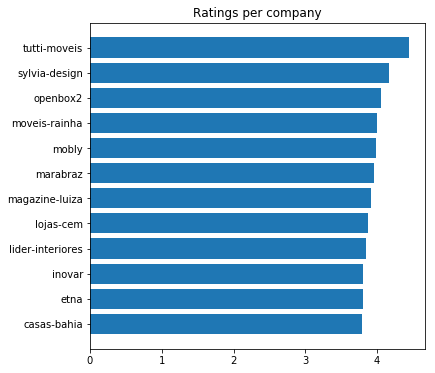

In [67]:
import matplotlib.pyplot as plt
view = dff.groupby('store').agg({'rating': 'mean'}).reset_index().dropna()

height = view["rating"].sort_values()
bars = view["store"]
y_pos = np.arange(len(bars))

fig, ax = plt.subplots(figsize=(6,6))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Ratings per company')
plt.show()

Stores has almost the same rating

In [68]:
a = dff.groupby('store').agg({'n_review_user': 'sum'}).reset_index().dropna().sort_values(by = 'n_review_user', ascending=False)
a


,store,n_review_user
0,casas-bahia,282506
5,magazine-luiza,189987
6,marabraz,22772
4,lojas-cem,19259
10,sylvia-design,8598
1,etna,7139
7,mobly,5346
9,openbox2,3784
8,moveis-rainha,3227
2,inovar,660


In [69]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import wordcloud
import pandas as pd
import nltk
from nltk.corpus import stopwords

word_cloud_text = ' '.join(dff['caption'])
stop_words = set(stopwords.words("portuguese"))
without_stop_words = []
sentence = word_cloud_text
words = nltk.word_tokenize(sentence)
for word in words:
    if word not in stop_words:
        without_stop_words.append(word.lower())

word_cloud_text_SW = ' '.join(without_stop_words)

wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text_SW)

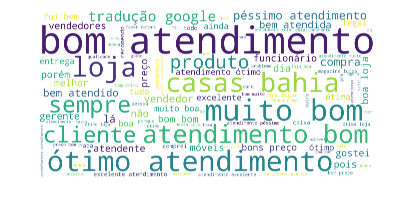

In [70]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Investigating low ratings

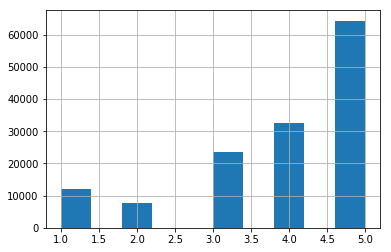

In [71]:
dff["rating"].hist()

In [72]:
#Rating over time

In [73]:
dff.loc[dff["rating"]<2]

,caption,date_comment,geo_location,id_review,len_comment,n_photo_user,n_review_user,rating,relative,relative_date,retrieval_date,store,url_user,username,year,month,week
23,Sistema trava na hora da compra mesmo com paga...,2020-03-14 17:25:42,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChZDSUhNMG9nS0VJQ0FnSUNzOTdTbU5REAEaFlNBUkRDdF...,105,0,0,1.0,30,um mês atrás,2020-04-13T17:25:42Z,casas-bahia,https://www.google.com/maps/contrib/1181737922...,Fernando !,2020,03/2020,11
52,Atendimento horroroso e preços horripilantes,2020-02-13 17:26:02,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChZDSUhNMG9nS0VJQ0FnSUNzbHVtQU9REAEaFjdpSFEta3...,44,0,0,1.0,60,2 meses atrás,2020-04-13T17:26:02Z,casas-bahia,https://www.google.com/maps/contrib/1111259834...,Christian Assolant Flocke,2020,02/2020,7
60,,2020-02-13 17:26:08,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNzOVBTYm1nRRABGhYtYUdIZ2...,0,0,0,1.0,60,2 meses atrás,2020-04-13T17:26:08Z,casas-bahia,https://www.google.com/maps/contrib/1049411468...,Felipe Gamer,2020,02/2020,7
61,Não vá neste local se vc for comprar apenas 1 ...,2020-02-13 17:26:08,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNzeElQSnZnRRABGhY3clMyaD...,100,0,0,1.0,60,2 meses atrás,2020-04-13T17:26:08Z,casas-bahia,https://www.google.com/maps/contrib/1122289233...,Leandro Fuentes,2020,02/2020,7
65,Minha mãe comprou uma geladeira em 14/12/19 e ...,2020-02-13 17:26:08,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChZDSUhNMG9nS0VJQ0FnSUNzaUxqNmVBEAEaFmQwc3AwQV...,404,0,0,1.0,60,2 meses atrás,2020-04-13T17:26:08Z,casas-bahia,https://www.google.com/maps/contrib/1128121304...,sergio reis,2020,02/2020,7
79,Estressante,2020-01-14 17:26:15,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChZDSUhNMG9nS0VJQ0FnSURNblp5ekxnEAEaFlEzOEZaRm...,11,0,22,1.0,90,3 meses atrás,2020-04-13T17:26:15Z,casas-bahia,https://www.google.com/maps/contrib/1177101777...,Con Cavalcante,2020,01/2020,3
89,,2020-01-14 17:26:22,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSURNaXNpVXBnRRABGhY0UEpCZ2...,0,0,1,1.0,90,3 meses atrás,2020-04-13T17:26:22Z,casas-bahia,https://www.google.com/maps/contrib/1052436255...,Vinícius Julio,2020,01/2020,3
92,"Péssima , atendimento horrível, não cumprem o ...",2020-01-14 17:26:29,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChZDSUhNMG9nS0VJQ0FnSURNck5ydE5nEAEaFlV2bkpLVk...,130,0,11,1.0,90,3 meses atrás,2020-04-13T17:26:29Z,casas-bahia,https://www.google.com/maps/contrib/1029821839...,Leticia Varolo,2020,01/2020,3
100,Vendedora Maria se preocupa mais em vender seg...,2019-12-15 17:26:35,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNNNzd5cmxRRRABGhZ5TFNMRm...,111,0,0,1.0,120,4 meses atrás,2020-04-13T17:26:35Z,casas-bahia,https://www.google.com/maps/contrib/1183023903...,Mauricio Oliveira,2019,12/2019,50
112,,2019-12-15 17:26:42,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChZDSUhNMG9nS0VJQ0FnSUNNOWZpekp3EAEaFkhVcGJDVG...,0,0,5,1.0,120,4 meses atrás,2020-04-13T17:26:42Z,casas-bahia,https://www.google.com/maps/contrib/1054667370...,Eliana Correa Bueno Lopes,2019,12/2019,50


# Conclusions

1-Regarding ReclameAqui has more complains than cumpliments , gb has most part of reviews are high rating. 

2-Big stores has more reviews that makes the mean rating bit low.



# Next steps

Suggestions:
1- Show key words in low raitngs using word2vec

2- Explore more location

3- ratings over the time